LA 레이커스의 경기 기록입니다.

1. 데이터 둘러보기

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\lee45\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lee45\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lee45\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lee45\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lee45\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [2]:
lakers = pd.read_csv("./data/lakers.csv")

In [3]:
lakers

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34619,20090414,UTA,home,00:42,4,free throw,UTA,Kyle Korver,made,1,NaN,NaN,NaN
34620,20090414,UTA,home,00:42,4,free throw,UTA,Kyle Korver,made,1,NaN,NaN,NaN
34621,20090414,UTA,home,00:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,NaN,NaN
34622,20090414,UTA,home,00:21,4,shot,UTA,Kyle Korver,missed,0,3pt,41.0,25.0


In [4]:
lakers.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [5]:
lakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
date         34624 non-null int64
opponent     34624 non-null object
game_type    34624 non-null object
time         34624 non-null object
period       34624 non-null int64
etype        34624 non-null object
team         34624 non-null object
player       29231 non-null object
result       16888 non-null object
points       34624 non-null int64
type         24242 non-null object
x            13067 non-null float64
y            13067 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


In [6]:
lakers.describe(include=np.object)

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,00:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [8]:
print('Oppenent: ', lakers['opponent'].unique())

Oppenent:  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']


In [13]:
# 데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", (lakers.shape[0]*lakers.shape[1]))
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(lakers.isnull().sum().sum(), (lakers.isnull().sum().sum() * 100 ) / (lakers.shape[0]*lakers.shape[1])))
print("LA 레이커스와 경기한 팀 수: ", lakers['opponent'].nunique()-1)
print("경기에 등장하는 행동 수: ", lakers['etype'].nunique())
print("경기에 등장하는 세부행동 수: ", lakers['type'].nunique())

총 데이터 개수:  450112
총 결측치 수: 76625 = 전체 데이터의 17.02% 
LA 레이커스와 경기한 팀 수:  28
경기에 등장하는 행동 수:  10
경기에 등장하는 세부행동 수:  73


2. 데이터 질문만들기
- LA레이커스의 홈 경기 vs 원정경기 비율
- 경기에서 선수들이 가장 많이 하는 행동유형(etype)
- 이번 시즌에서 LA레이커스의 경기 결과
- LA 레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 좋아하는가

3. 데이터 정비하기

In [14]:
lakers['date'] = lakers['date'].apply(str)
lakers['datetiem'] = lakers['date'] + ' ' + lakers['time']
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetiem
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [20]:
lakers['datetime'] = pd.to_datetime(lakers['datetime'], format='%Y%m%d %H:%M:%S')
lakers['date'] = pd.to_datetime(lakers['date'], format='%Y%m%d')
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [17]:
type(lakers)

pandas.core.frame.DataFrame

In [18]:
lakers.rename(columns = {'datetiem' : 'datetime'}, inplace=True)

In [19]:
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [21]:
# 결측지 작업
lakers.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

In [23]:
# player, result, type은 object 값이 들어가 있으므로, 굳이 NaN 값을 채울 필요 없음.
# x, y에는 그냥 0을 넣지만, 넣기 전에 실제 데이터에 0이 존재하는지
print(lakers.index[lakers['x'] == '0'].tolist())
print(lakers.index[lakers['y'] == '0'].tolist())

[]
[]


In [24]:
lakers['x'].fillna(0, inplace=True)
lakers['y'].fillna(0, inplace=True)

In [25]:
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


4. EDA & Visualizaion

In [27]:
# 날짜별로 홈 경기인지 원정경기인지
lakers[['date', 'game_type']].groupby(['date', 'game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [28]:
# 날짜에 경기 타입 데이터가 중복, 처음 하나만 남기고 날려서 해결
df1 = lakers.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54856 missing from c

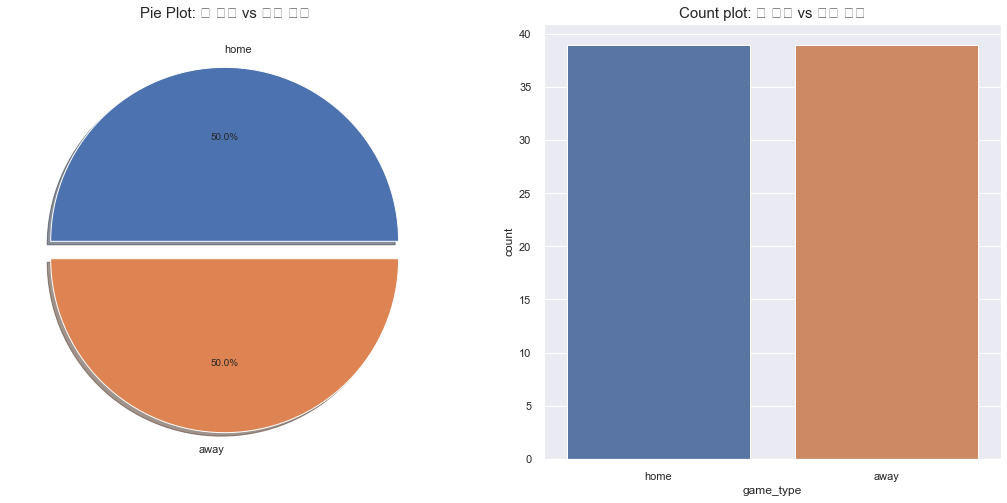

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

df1['game_type'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot: 홈 경기 vs 원정 경기', size=15)
ax[0].set_ylabel('')

sns.countplot('game_type', data=df1, ax=ax[1])
ax[1].set_title('Count plot: 홈 경기 vs 원정 경기', size=15)

plt.show()

In [31]:
# 핻동 유형 확이
print('Etype: ', lakers['etype'].unique())
print('개수로 표시: ', lakers['etype'].nunique())

Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
개수로 표시:  10


In [32]:
lakers['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from c

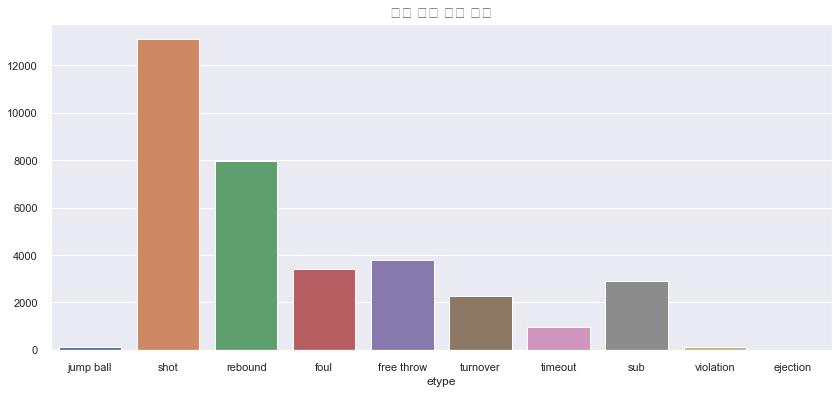

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

sns.countplot(x=lakers['etype'], ax=ax)
ax.set_title("행동 유형 발생 횟수", size=15)
ax.set_ylabel('')

plt.show()

In [36]:
lakers.groupby(['etype', 'period']).size()

etype       period
ejection    3            1
foul        1          665
            2          887
            3          848
            4         1002
            5           15
free throw  1          666
            2          944
            3          949
            4         1205
            5           16
jump ball   1           85
            2           16
            3            7
            4           21
            5            2
rebound     1         2023
            2         1966
            3         1986
            4         1976
            5           20
shot        1         3500
            2         3279
            3         3232
            4         3063
            5           34
sub         1          555
            2          915
            3          584
            4          832
            5            5
timeout     1          166
            2          266
            3          185
            4          327
            5            6
turnover 

In [39]:
df2 = lakers.groupby(['etype', 'period']).size().reset_index().pivot(columns='period', index='etype', values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from c

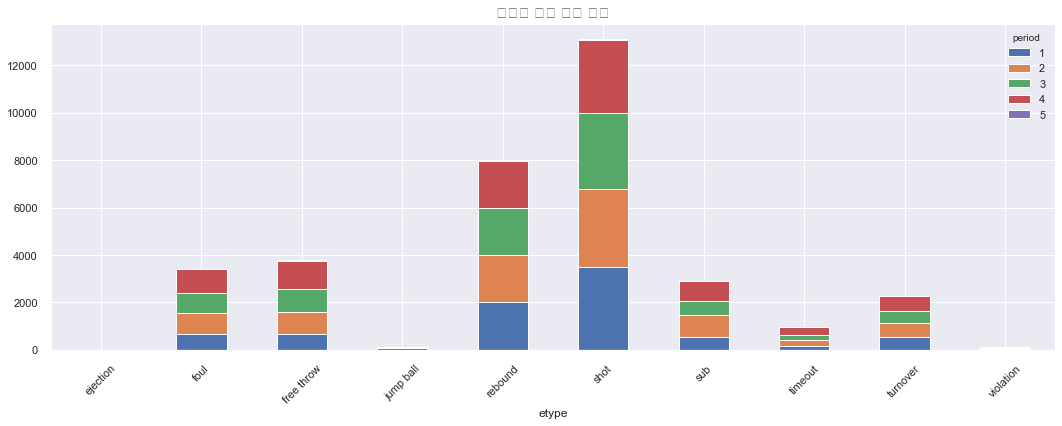

In [40]:
# stack plot
df2.plot(kind='bar', stacked=True, figsize=(18,6))
plt.title('쿼터별 행동 발생 횟수', size=15)
plt.xticks(rotation=45)

plt.show()


In [42]:
# 날짜별로 경기 결과를 group by
made = lakers['result'].isin(['made'])
lakers[made].head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [50]:
df3 = lakers[made][['date', 'points', 'team']].groupby(['date', 'team'], as_index=True).sum()
df3

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [51]:
df3.reset_index(inplace=True)

In [52]:
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [53]:
lal = df3[df3['team'] == 'LAL']
opp = df3[df3['team'] != 'LAL']

In [54]:
df4 = pd.merge(lal, opp, on='date')

In [55]:
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [57]:
win = df4[df4['points_x'] > df4['points_y']]
los = df4[df4['points_x'] < df4['points_y']]

print("08 - 09 시즌 LA레이커스의 총 {}회의 경기 중, {}번 승리".format(df4.shape[0], win.shape[0]))

08 - 09 시즌 LA레이커스의 총 78회의 경기 중, 63번 승리


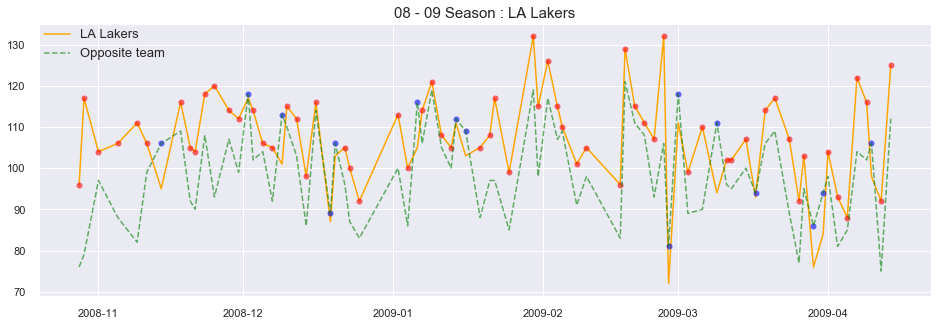

In [60]:
plt.figure(figsize=(16, 5))

plt.title("08 - 09 Season : LA Lakers", fontsize=15)

plt.plot(lal['date'], lal['points'], "-", alpha=1, color='orange', label='LA Lakers')

plt.plot(win['date'], win['points_x'], 'o', alpha=.6, color='red')
plt.plot(los['date'], los['points_y'], 'o', alpha=.6, color='blue')

plt.plot(opp['date'], opp['points'], '--', alpha=.6, color='green', label='Opposite team')

plt.legend(loc='upper left', borderaxespad=0, fontsize=13)

plt.show()

In [61]:
# 코트 위치별 행동
lal2 = lakers[lakers['team'] == 'LAL']

In [66]:
lal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17235 entries, 1 to 34623
Data columns (total 14 columns):
date         17235 non-null datetime64[ns]
opponent     17235 non-null object
game_type    17235 non-null object
time         17235 non-null object
period       17235 non-null int64
etype        17235 non-null object
team         17235 non-null object
player       14740 non-null object
result       8587 non-null object
points       17235 non-null int64
type         12094 non-null object
x            17235 non-null float64
y            17235 non-null float64
datetime     17235 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 2.0+ MB


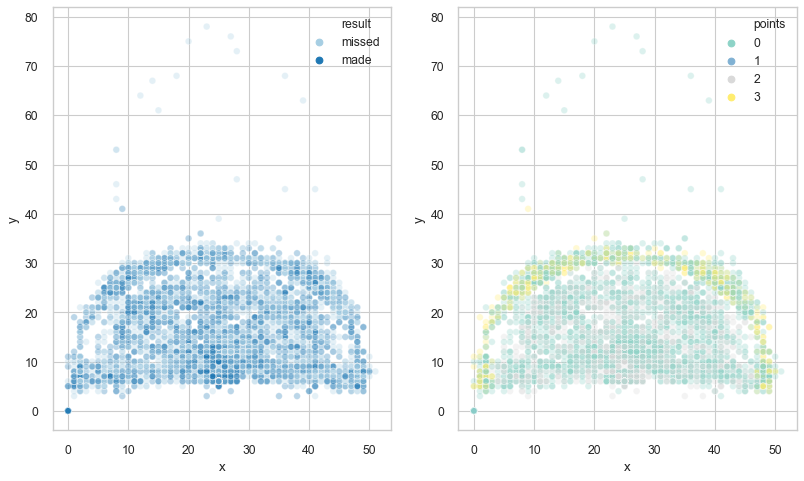

In [69]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(12,7), dpi=80)

g1 = sns.scatterplot(data=lal2, x='x', y='y', hue='result', alpha=0.3, palette='Paired', ax=ax[0])
# g2 = sns.kdeplot(data=lal2, x='x', y='y', hue='result', palettes='Paried', ax=ax[0])

g3 = sns.scatterplot(data=lal2, x='x', y='y', hue='points', alpha=0.3, palette='Set3', ax=ax[1])
# g4 = sns.kdeplot(data=lal2, x='x', y='y', hue='points', palettes='Set3', ax=ax[1])

plt.show()

In [71]:
lal3 = lal2[lal2['type'].isin(lal2['type'].value_counts().head(10).index)]

In [73]:
lal3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10176 entries, 1 to 34623
Data columns (total 14 columns):
date         10176 non-null datetime64[ns]
opponent     10176 non-null object
game_type    10176 non-null object
time         10176 non-null object
period       10176 non-null int64
etype        10176 non-null object
team         10176 non-null object
player       9865 non-null object
result       5046 non-null object
points       10176 non-null int64
type         10176 non-null object
x            10176 non-null float64
y            10176 non-null float64
datetime     10176 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


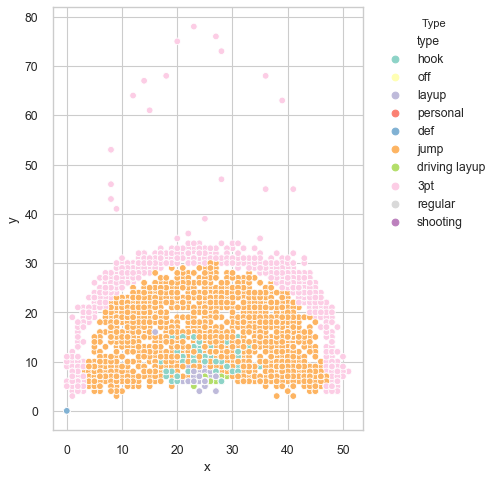

In [74]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(5,7), dpi=80)

sns.scatterplot(data=lal3, x='x', y='y', hue=lal3['type'], palette='Set3', ax=ax)

ax.legend(title='Type', bbox_to_anchor=(1.03,1))

plt.show()